In [1]:
%load_ext autoreload
import uproot as ut
import utils
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from utils.cutConfig import *
%autoreload 2

In [2]:
filename = "../signal/NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_May2021.root:sixBtree"
ttree = ut.open(filename)
branches = utils.Branches(ttree)
all_sixb = utils.Selection(branches,cuts={},mask=branches.sixb_found_mask,tag="sixb found")
print(all_sixb)

--- all sixb found ---
Event Efficiency:      0.36
Event Selected Purity: 0.57


In [3]:
savedir = "ufcsc_plots"
def save(fig,saveas): fig.savefig(f"{savedir}/{saveas}.pdf",format="pdf")

In [4]:
baseline = utils.Selection(branches,cuts={"passthrough":1},variable="jet_btag",njets=6,tag="baseline",include=all_sixb)
print(baseline)
mask = baseline.mask

--- all sixb found & 6 baseline ---
Event Efficiency:      1.0
Event Selected Purity: 0.40


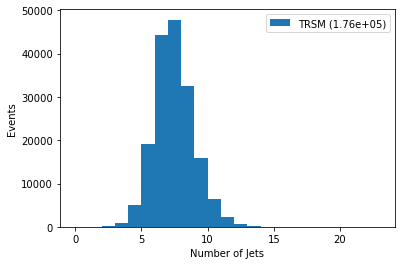

In [5]:
njets = baseline.njets_passed[mask]
fig, ax = utils.hist_multi([njets],bins=range(24),labels=["TRSM"],xlabel="Number of Jets")
save(fig,"raw_njets")

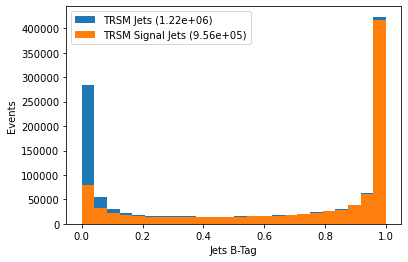

In [6]:
jets = baseline.jets_passed
sixb = baseline.sixb_passed
jet_btag = ak.flatten(branches["jet_btag"][jets][mask])
sixb_btag = ak.flatten(branches["jet_btag"][sixb][mask])
fig, ax = utils.hist_multi([jet_btag,sixb_btag],bins=np.linspace(0,1,25),labels=["TRSM Jets","TRSM Signal Jets"],xlabel="Jets B-Tag")
save(fig,"raw_jet_btag")

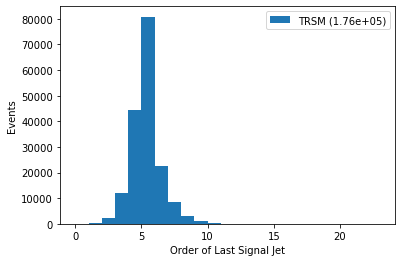

In [7]:
sixb_pos = baseline.sixb_position
last_index = utils.get_jet_index_mask(branches,ak.count(sixb_pos,axis=-1)[:,np.newaxis]-1,jets=sixb_pos)
all_last_pos = ak.flatten(sixb_pos[last_index][mask])
fig,ax = utils.hist_multi([all_last_pos],bins=range(24),labels=["TRSM"],xlabel="Order of Last Signal Jet")

--- all sixb found & 6 baseline ---
Event Efficiency:      1.0
Event Selected Purity: 0.40


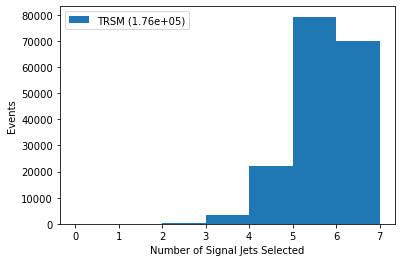

In [8]:
print(baseline)
nsixb = baseline.nsixb_selected[mask]
fig,ax = utils.hist_multi([nsixb],bins=range(8),labels=["TRSM"],xlabel="Number of Signal Jets Selected")
save(fig,"raw_nsixb_top6")